In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

eth_data = pd.read_csv(r'C:\Users\saart\Desktop\Portfolio\Cryto data\Binance_ETHUSDT_d.csv')
btc_data = pd.read_csv(r'C:\Users\saart\Desktop\Portfolio\Cryto data\Binance_BTCUSDT_d.csv')
xrp_data = pd.read_csv(r'C:\Users\saart\Desktop\Portfolio\Cryto data\Binance_XRPUSDT_d.csv')

#Quick check
xrp_data.head()

,unix,Date,symbol,open,high,low,close,Volume XRP,Volume USDT,tradecount
0,1.646440e+12,05 03 2022,XRP/USDT,0.7127,0.7131,0.7074,0.7121,4635328.0,3.291117e+06,3663
1,1.646350e+12,04 03 2022,XRP/USDT,0.7514,0.7550,0.6942,0.7127,382831997.0,2.794508e+08,325418
2,1.646270e+12,03 03 2022,XRP/USDT,0.7688,0.7897,0.7336,0.7515,339295156.0,2.576649e+08,298359
3,1.646180e+12,02 03 2022,XRP/USDT,0.7840,0.7848,0.7562,0.7687,377602100.0,2.908917e+08,306050
4,1.646090e+12,01 03 2022,XRP/USDT,0.7809,0.8039,0.7574,0.7839,392126769.0,3.053092e+08,396934


In [17]:
#Collecting dates and closing prices from the data
db_eth = eth_data.iloc[:,[1,6]]
db_btc = btc_data.iloc[:,[1,6]]
db_xrp = xrp_data.iloc[:,[1,6]]

#Merging all three crypto data on the date
ETHxBTC = pd.merge(db_eth, db_btc, on='Date', how='inner')
ETHxBTCxXRP = pd.merge(db_xrp,ETHxBTC, on='Date', how='inner')

#Set the date as the index
ETHxBTCxXRP.set_index('Date',inplace=True, drop=True)

cols = {'close':'XRP','close_x':'ETH','close_y':'BTC'}
ALL = ETHxBTCxXRP.rename(columns =cols, inplace= False)
ALL.head()

,XRP,ETH,BTC
Date,,,
05 03 2022,0.7121,2619.07,39081.88
04 03 2022,0.7127,2622.10,39148.66
03 03 2022,0.7515,2833.99,42454.00
02 03 2022,0.7687,2947.30,43892.98
01 03 2022,0.7839,2976.33,44421.20


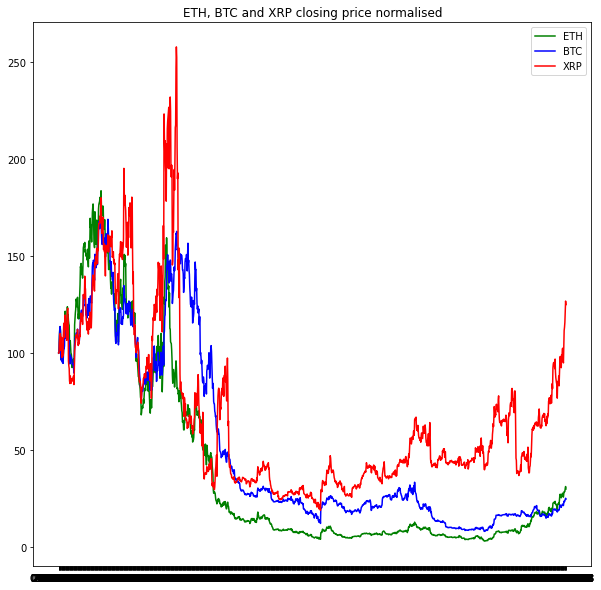

In [19]:
#Normalised data (Normalising the two graphs to see if the closing prices tracked eachother over time)
x1 = ALL['ETH']/ALL['ETH'].iloc[0]*100
x2 = ALL['BTC']/ALL['BTC'].iloc[0]*100
x3 = ALL['XRP']/ALL['XRP'].iloc[0]*100

plt.figure(figsize=(10,10))
plt.plot(x1,c='green',label='ETH')
plt.plot(x2,c='blue',label='BTC')
plt.plot(x3,c='red',label = 'XRP')
plt.title('ETH, BTC and XRP closing price normalised')
plt.style.use('tableau-colorblind10')
plt.legend()
plt.savefig('ETH, BTC and XRP closing price normalised.jpeg', bbox_inches='tight')

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

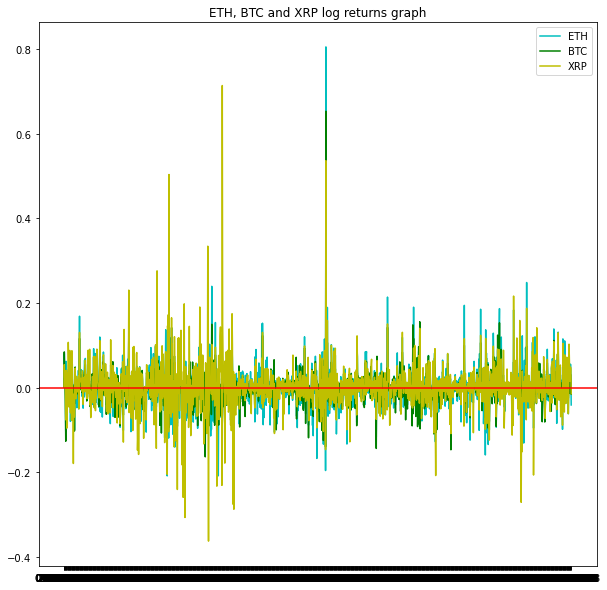

In [23]:
# Log graphs
log_eth = (ALL['ETH']/ALL['ETH'].shift(1)) - 1
log_btc = (ALL['BTC']/ALL['BTC'].shift(1)) - 1
log_xrp = (ALL['XRP']/ALL['XRP'].shift(1)) - 1

plt.figure(figsize=(10,10))
plt.plot(log_eth,'-c',label='ETH')
plt.plot(log_btc,'-g',label='BTC')
plt.plot(log_xrp,'-y',label='XRP')
plt.title('ETH, BTC and XRP log returns graph')
plt.legend()

#Plot the Zero line
plt.axhline(y=0, color='r', linestyle='-')

plt.savefig('ETH, BTC and XRP log returns graph.jpeg', bbox_inches='tight')

plt.show

In [28]:
# Looking at a portfolio composed of the three stocks weighted accodingly:
weights = np.array([0.07,0.23,0.7])

# Calculating the simple returns
returns = (ALL/ALL.shift(1)) - 1
returns

,XRP,ETH,BTC
Date,,,
05 03 2022,NaN,NaN,NaN
04 03 2022,0.000843,0.001157,0.001709
03 03 2022,0.054441,0.080809,0.084430
02 03 2022,0.022888,0.039982,0.033895
01 03 2022,0.019774,0.009850,0.012034
...,...,...,...
08 05 2018,0.014922,-0.003671,-0.013151
07 05 2018,0.022599,0.004673,0.019313
06 05 2018,0.048406,0.055562,0.031395


In [26]:
#The average daily rate of return in a percentage
print("Portfolio's average daily log returns = " + str(round(np.dot(returns.mean(),weights),4)*100) + '%')

#The average yearly rate of return in a percentage (Assuming there is an average of 250 trading days in a year)
print("Portfolio's average annual log returns = " + str(round(np.dot(returns.mean()*250,weights),5)*100) + '%')

Portfolio's average daily log returns = 0.01%
Portfolio's average annual log returns = 2.788%
